# Множественная линейная регрессия на чистых данных

Цель работы
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

Содержание работы
Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [3]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [8]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [24]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [26]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


In [9]:
x.shape

(387, 5)

In [10]:
y.shape

(387, 1)

In [13]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создадим объект модели:
binary = LinearRegression()

In [15]:
binary.fit(x[[1]], y)

LinearRegression()

In [16]:
binary.coef_

array([[95.52010745]])

In [17]:
# Метод predict() рассчитывает теоретические значения признака:

binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

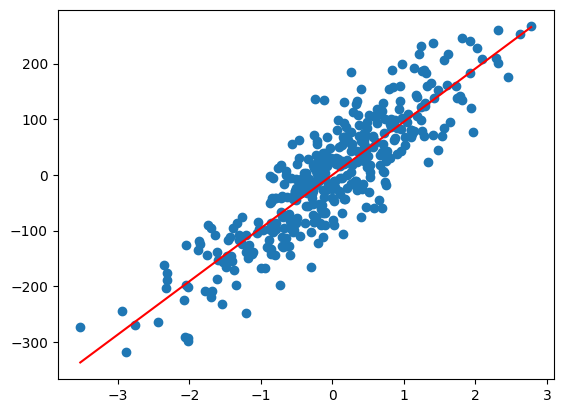

In [20]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')
plt.scatter(x[1], y)

In [22]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

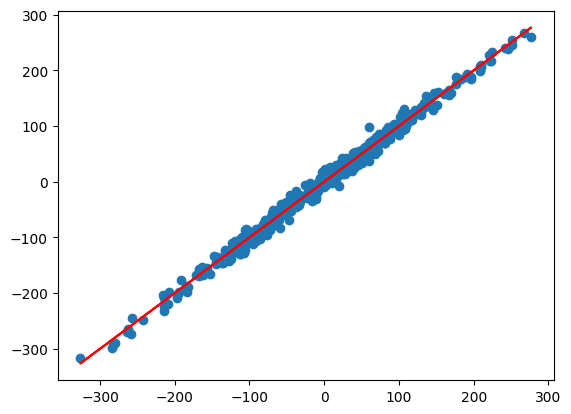

In [23]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# Задания для самостоятельного выполнения
Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [ ]:
from sklearn.metrics import r2_score

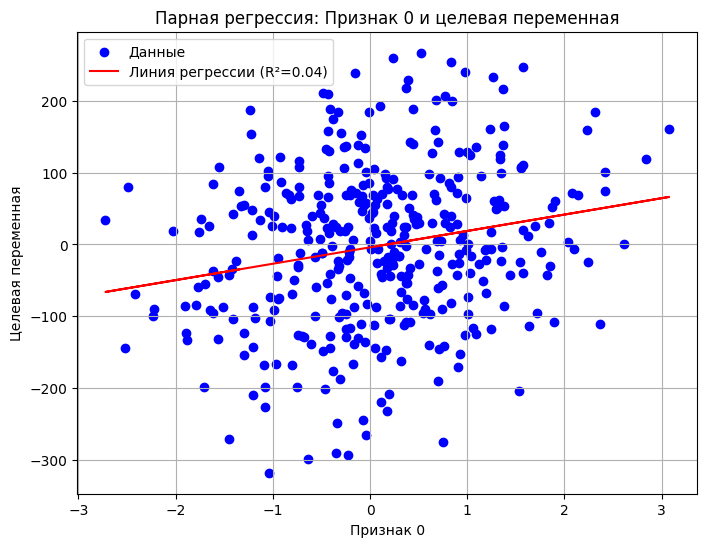

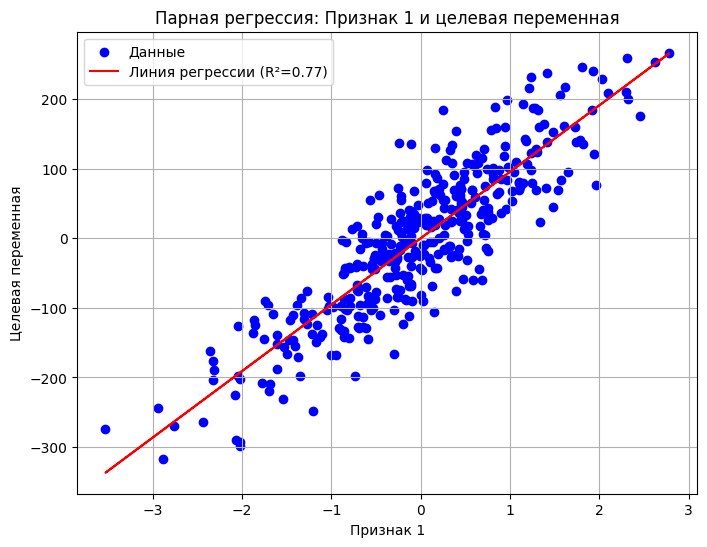

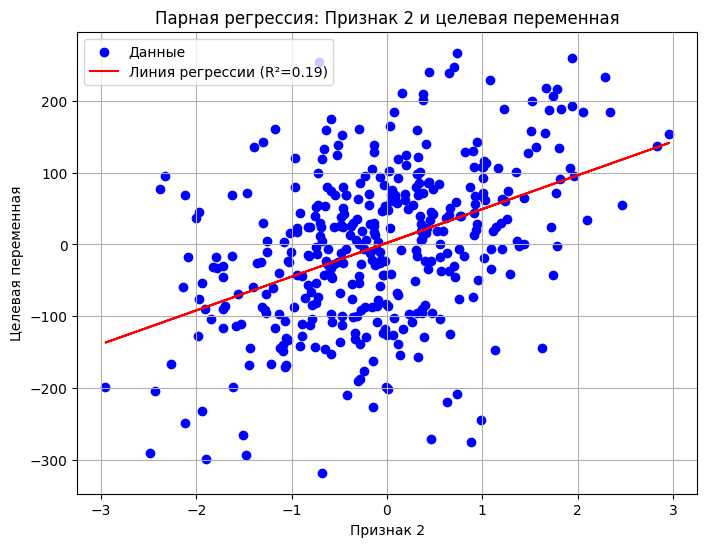

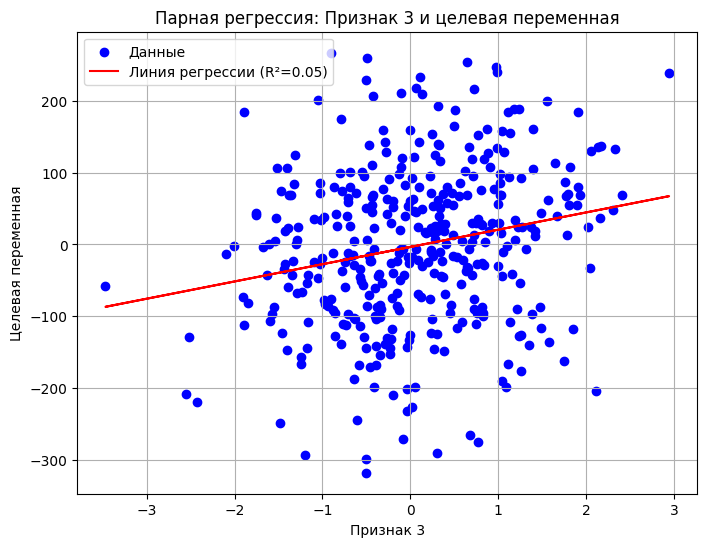

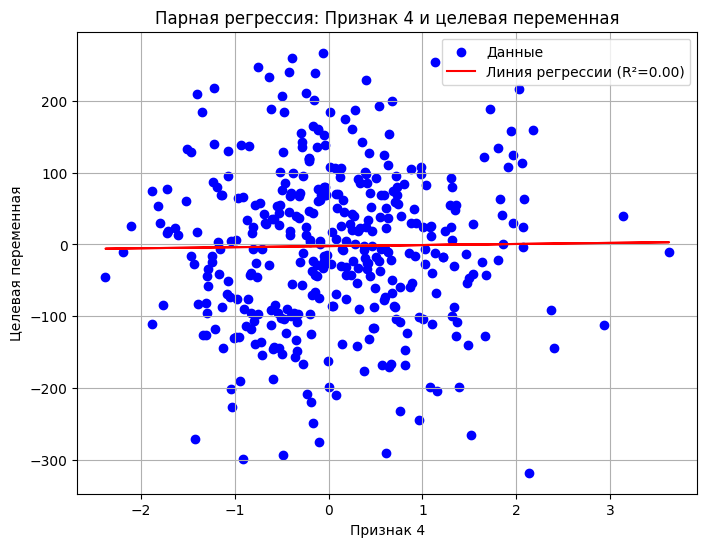

In [28]:
# Построение парных регрессий
for feature in x.columns:
    # Модель линейной регрессии
    model = LinearRegression()
    X_feature = x[[feature]]  # Извлекаем один признак
    model.fit(X_feature, y)

    # Предсказания модели
    y_pred = model.predict(X_feature)

    # Коэффициент детерминации R^2
    r2 = r2_score(y, y_pred)

    # Построение графиков
    plt.figure(figsize=(8, 6))
    plt.scatter(X_feature, y, color="blue", label="Данные")
    plt.plot(X_feature, y_pred, color="red", label=f"Линия регрессии (R²={r2:.2f})")
    plt.title(f"Парная регрессия: Признак {feature} и целевая переменная")
    plt.xlabel(f"Признак {feature}")
    plt.ylabel("Целевая переменная")
    plt.legend()
    plt.grid()
    plt.show()

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

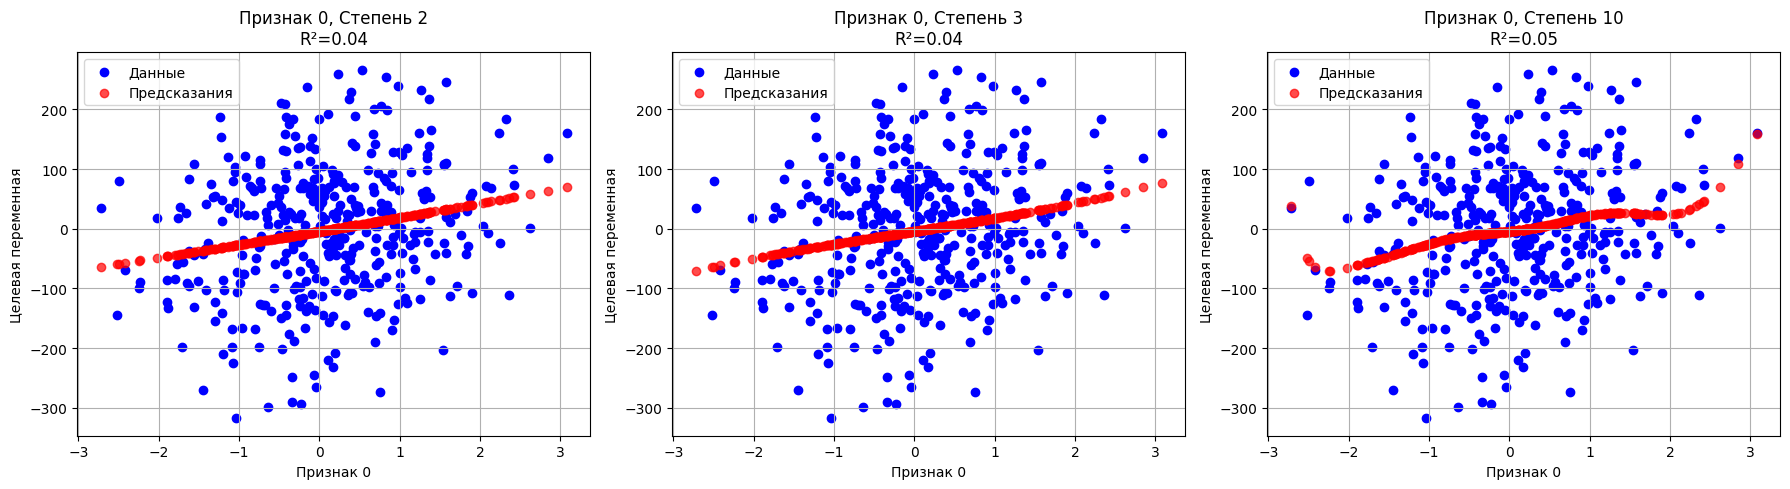

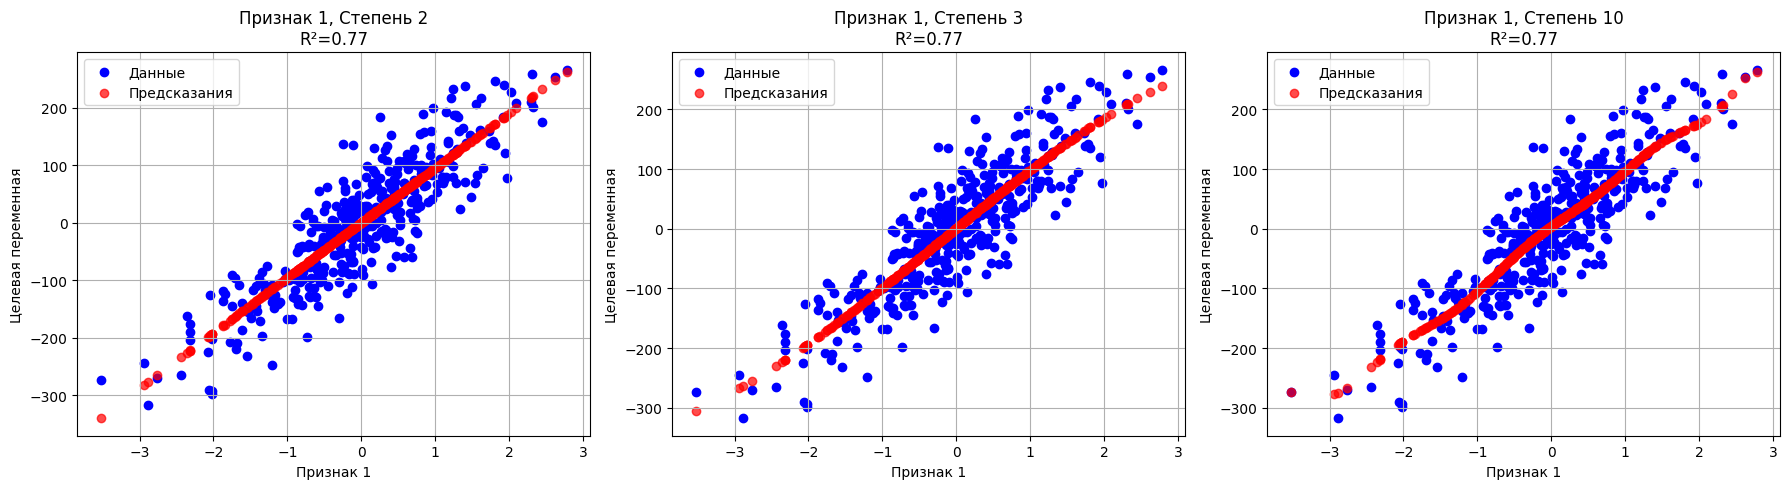

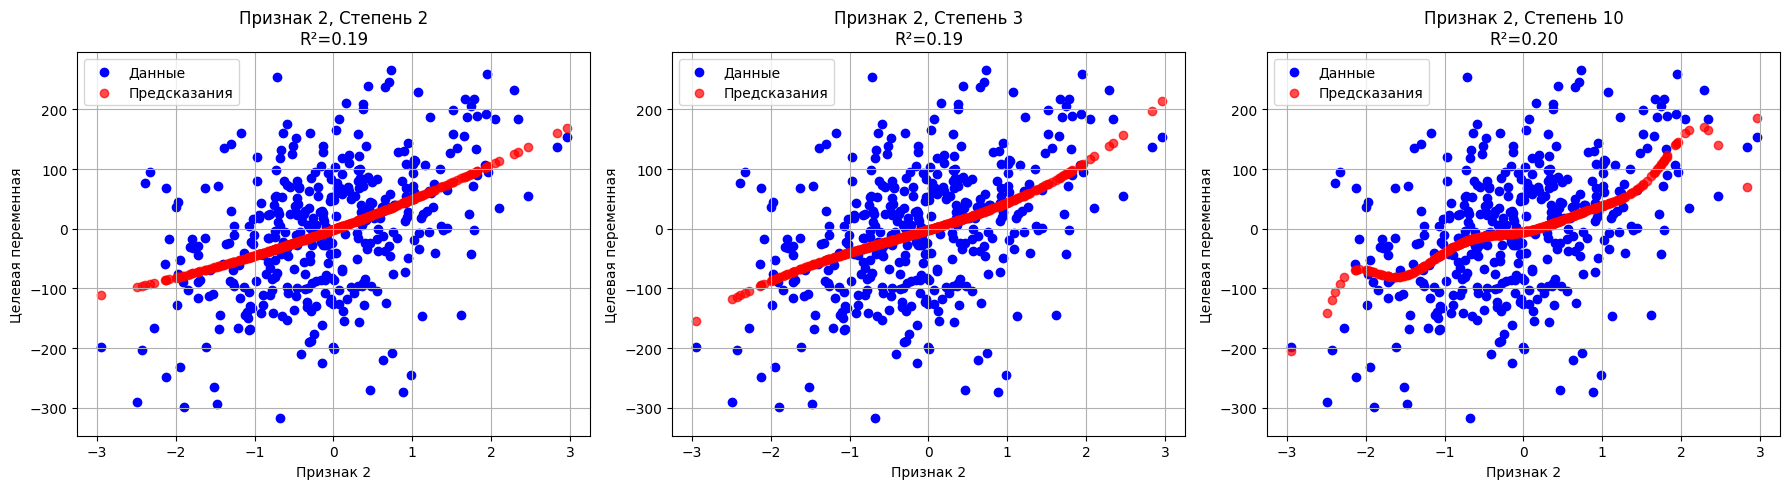

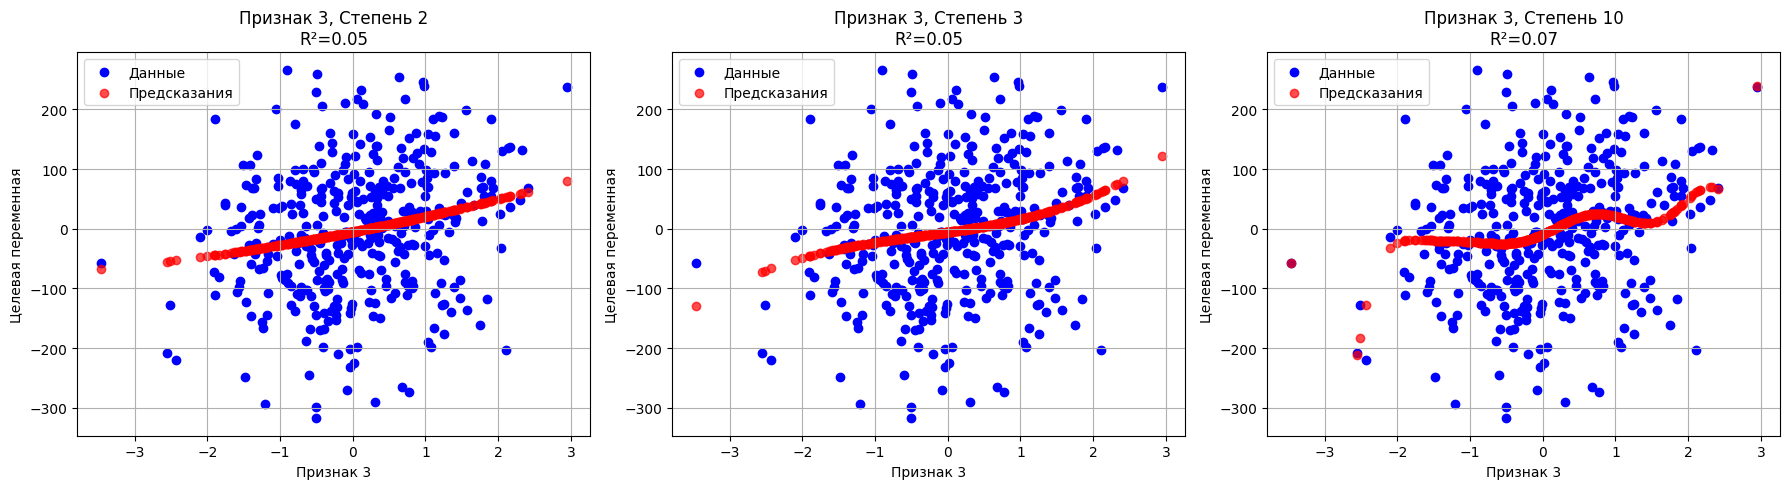

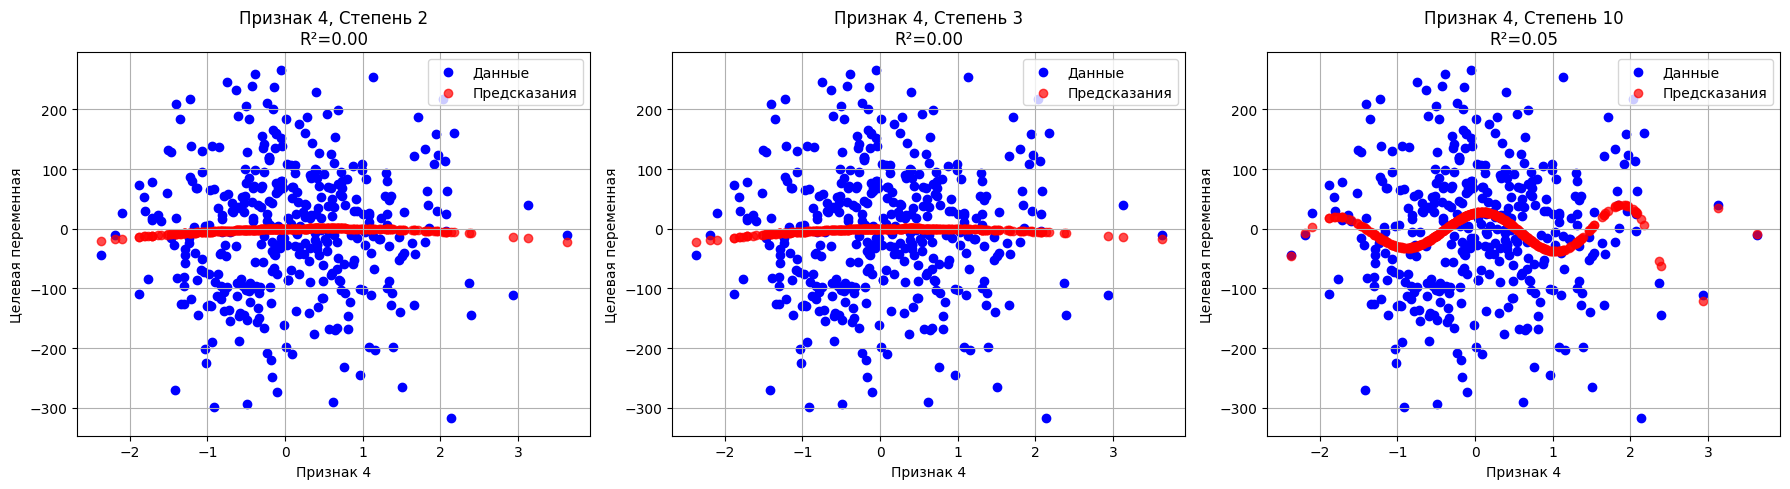

In [30]:
degrees = [2, 3, 10]

# Полиномиальная регрессия для каждого признака
for feature in x.columns:
    X_feature = x[[feature]]  # Берем один признак
    plt.figure(figsize=(18, 5))

    for i, degree in enumerate(degrees):
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_feature)

        # Линейная регрессия
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        # Оценка качества регрессии
        r2 = r2_score(y, y_pred)

        # Построение графиков
        plt.subplot(1, len(degrees), i + 1)
        plt.scatter(X_feature, y, color="blue", label="Данные")
        plt.scatter(X_feature, y_pred, color="red", label="Предсказания", alpha=0.7)
        plt.title(f"Признак {feature}, Степень {degree}\nR²={r2:.2f}")
        plt.xlabel(f"Признак {feature}")
        plt.ylabel("Целевая переменная")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
degrees = [2, 3, 10]

# Создание сводной таблицы
results = []

# Полиномиальная регрессия для каждого признака
for feature in x.columns:
    X_feature = x[[feature]]  # Берем один признак

    for degree in degrees:
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_feature)

        # Линейная регрессия
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        # Метрики
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        # Сохранение результатов
        results.append({
            "Признак": feature,
            "Степень полинома": degree,
            "R²": r2,
            "MSE": mse
        })

# Создание сводной таблицы
results_df = pd.DataFrame(results)
print("Сводная таблица метрик:")
print(results_df)

Сводная таблица метрик:
    Признак  Степень полинома        R²           MSE
0         0                 2  0.043672  11491.909255
1         0                 3  0.043765  11490.787323
2         0                10  0.050356  11411.586520
3         1                 2  0.769994   2763.909753
4         1                 3  0.771118   2750.401156
5         1                10  0.772677   2731.672893
6         2                 2  0.190008   9733.431563
7         2                 3  0.192802   9699.859735
8         2                10  0.204409   9560.372197
9         3                 2  0.047943  11440.588266
10        3                 3  0.050312  11412.119234
11        3                10  0.072667  11143.475913
12        4                 2  0.001049  12004.093016
13        4                 3  0.001065  12003.905964
14        4                10  0.045053  11475.314939


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [34]:
from sklearn.metrics import mean_absolute_error

# Загрузка данных
x = pd.DataFrame({
    0: [0.071841, 0.139521, 1.626311, -1.183233, -0.783365],
    1: [0.855352, -0.423507, -0.257622, -0.826343, -0.861232],
    2: [-0.305597, 0.461059, -0.697520, 0.073047, 0.951448],
    3: [0.028253, -0.447400, 1.413219, -0.639690, -0.117306],
    4: [1.826895, -0.034988, 1.086292, -0.503273, 0.680597]
})
y = pd.Series([63.320498, -23.426394, 11.982771, -102.883304, -49.373475])

# Порядки полинома
degrees = [2, 3, 10]

# Создание сводной таблицы
results = []

# Полиномиальная регрессия для каждого признака
for feature in x.columns:
    X_feature = x[[feature]]  # Берем один признак

    for degree in degrees:
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_feature)

        # Линейная регрессия
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        # Метрики
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y - y_pred) / y)) * 100

        # Сохранение результатов
        results.append({
            "Признак": feature,
            "Степень полинома": degree,
            "R²": r2,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape
        })

# Создание сводной таблицы
results_df = pd.DataFrame(results)
print("Сводная таблица метрик:")
print(results_df)


Сводная таблица метрик:
    Признак  Степень полинома        R²           MSE           MAE  \
0         0                 2  0.741763  8.113467e+02  1.887373e+01   
1         0                 3  0.748086  7.914818e+02  1.964367e+01   
2         0                10  1.000000  2.586982e-24  1.190159e-12   
3         1                 2  0.879955  3.771650e+02  1.522689e+01   
4         1                 3  0.915416  2.657527e+02  1.283600e+01   
5         1                10  1.000000  1.716561e-27  3.694822e-14   
6         2                 2  0.311664  2.162664e+03  3.725978e+01   
7         2                 3  0.365780  1.992637e+03  3.746295e+01   
8         2                10  1.000000  7.607648e-26  2.195577e-13   
9         3                 2  0.656531  1.079137e+03  2.615288e+01   
10        3                 3  0.666087  1.049113e+03  2.694197e+01   
11        3                10  1.000000  2.842467e-24  1.610800e-12   
12        4                 2  0.830096  5.338174e+02